In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report
from keras.utils import to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 18s 2us/step


# Visualizing the Dataset

In [4]:
import matplotlib.pyplot as plt

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_image.shape

(28, 28)

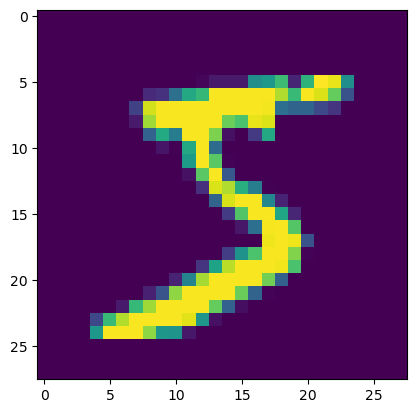

In [11]:
plt.imshow(single_image)

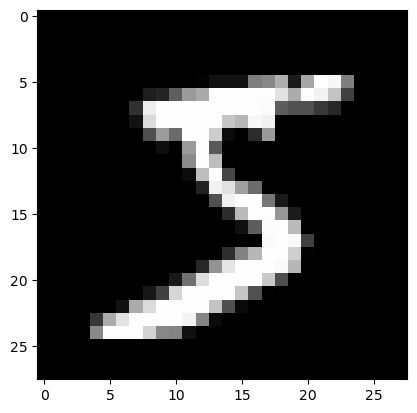

In [12]:
plt.imshow(single_image, cmap='gray')

In [13]:
single_image = x_train[50]

In [14]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

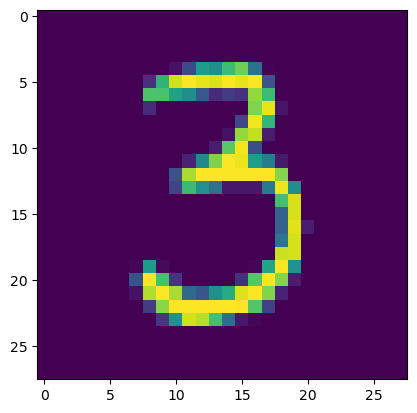

In [15]:
plt.imshow(single_image)

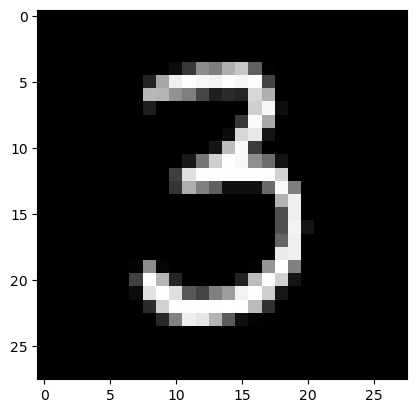

In [16]:
plt.imshow(single_image, cmap='gray')

***Data Preprocessing***

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train.shape

(60000,)

In [22]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
y_example.shape

(60000, 10)

In [25]:
y_cat_train = to_categorical(y_train,10) 

In [26]:
y_cat_test = to_categorical(y_test,10)

In [27]:
single_image.max()

255

In [28]:
single_image.min()

0

***Normalization***

In [29]:
x_train = x_train/255
x_test = x_test/255 

In [30]:
scaled_image = x_train[0]

In [31]:
scaled_image.max()

1.0

In [32]:
scaled_image.min()

0.0

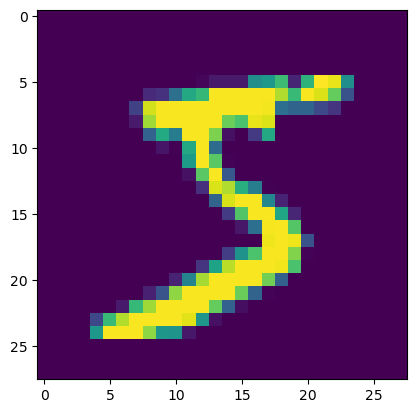

In [33]:
plt.imshow(scaled_image)

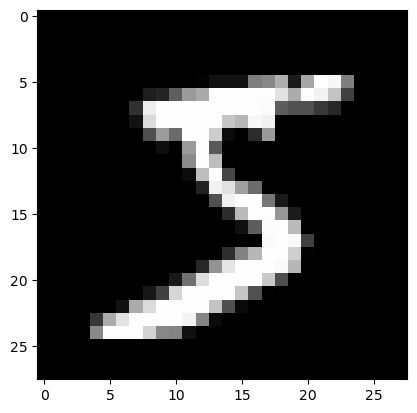

In [34]:
plt.imshow(scaled_image, cmap='gray')

In [35]:
x_train.shape

(60000, 28, 28)

***Reshaping Dataset***

In [39]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [41]:
x_train.shape

(60000, 28, 28, 1)

In [42]:
x_test = x_test.reshape(10000,28,28,1)

In [45]:
x_test.shape

(10000, 28, 28, 1)

***Modelling***

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [63]:
model = Sequential() 

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Conv2D(filters=16, kernel_size=(4, 4), activation = 'relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [64]:
model.compile(loss='categorical_crossentropy', 
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        8208      
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               204928    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [66]:
model.fit(x_train,y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1338 - accuracy: 0.9582
Epoch 2/2
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0435 - accuracy: 0.9872


In [67]:
model.metrics_names

['loss', 'accuracy']

In [68]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0325 - accuracy: 0.9888


[0.03248196840286255, 0.9887999892234802]

***Classification***

In [69]:
from sklearn.metrics import classification_report

In [70]:
import numpy as np

In [71]:
predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 14ms/step


In [72]:
report = classification_report(y_test, predictions_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

